## OECD Term Matching

#### Author: Cierra Oliveira

#### Date: 6/21/2021

#### Importing libraries and data

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import gensim
import time
import seaborn as sns

In [2]:
import collections
from wordcloud import WordCloud

In [3]:
df = pd.read_pickle("/home/dab3dj/git/dspg21RnD/data/dspg21RnD/final_dataset_7-20.pkl")

df.reset_index(inplace = True)

#### Reading in already matched abstracts and gettings stats

In [ ]:
ai = pd.read_csv("/home/dab3dj/git/dspg21RnD/data/dspg21RnD/term_matched_abstracts_final.csv")


In [50]:
ai = ai[ai['IS_AI']!= "False"]

In [52]:
ai_years = ai['PROJECT_START_DATE']

In [22]:
from datetime import datetime

In [53]:
ai_years = pd.to_datetime(ai_years)

In [54]:
ai_years = ai_years.dt.year

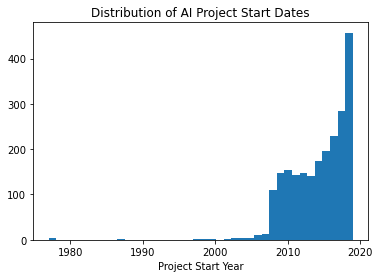

In [75]:
# change to bar 
fig, ax = plt.subplots()
ax.hist(ai_years, bins = 40)
plt.title("Distribution of AI Project Start Dates")
plt.xlabel("Project Start Year")
plt.show()

In [76]:
plt.savefig("project_years_hist.png")

<Figure size 432x288 with 0 Axes>

In [71]:
ai_depts = ai['DEPARTMENT']

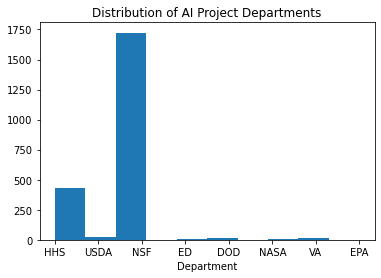

In [74]:
# change to bar chart - prop 
fig, ax = plt.subplots()
ax.hist(ai_depts, align='mid')
plt.title("Distribution of AI Project Departments")
plt.xlabel("Department")
plt.show()

#### Creating core and non-core query words
##### Source: OECD Selected list of AI key term

In [4]:
core_terms = ["adaboost","artificial intelligence","artificial neural network","back propagation"
,"back propagation neural network","computational intelligence","computer vision"
,"convolutional neural network","deep belief network","deep convolutional neural network"
,"deep learn","deep neural network","elman network","elman neural network"
,"expert system","fee forward neural network","inference engine","machine intelligence"
,"machine learn","machine translation","machine vision","multilayer neural network"
,"natural language process","perceptron","random forest","rbf neural network","recurrent neural network"
,"self organize map","spike neural network","supervise learn","support vector machine"
,"svm classifier","unsupervised learn","artificial_intelligence","artificial_neural_network","back_propagation"
,"back_propagation_neural_network","computational_intelligence","computer_vision"
,"convolutional_neural_network","deep_belief_network","deep_convolutional_neural_network"
,"deep_learn","deep_neural_network","elman_network","elman_neural_network"
,"expert_system","fee_forward_neural_network","inference_engine","machine_intelligence"
,"machine_learn","machine_translation","machine_vision","multilayer_neural_network"
,"natural_language_process","random_forest","rbf_neural_network","recurrent_neural_network"
,"self_organize_map","spike_neural_network","supervise_learn","support_vector_machine"
,"svm_classifier","unsupervised_learn"]

In [5]:
noncore_terms = ["actor critic", "analog vlsi", "associative memory", "autonomous vehicle", "bayes classifer",
"bayesian belief network", "bioinformatics", "camera calibration", "collaborative system",
"commonsense reason", "computational biology", "datum mine", "decision tree", "description logic",
"dimensionality reduction", "discriminant analysis", "fuzzy logic", "gene ontology", "hide markov model",
"humanoid", "image alignment", "image match", "information retrieval", "kegg pathway", "knowledge base", 
"knowledge representation and reason", "linear discriminant", "markov decision process",
"mulitclass classification", "naive bayes", "name entity recognition", "near neighbor classifier", 
"neural network", "neuro fuzzy", "neuromorphic compute", "neuromorphic hardware", "non rigid registration", 
"nonmonotonic reason", "object recognition", "opinion mine", "optimal search", "pattern analysis", 
"pattern recognition", "person re identification", "principal component analysis", "question answer", "radial basis function",
"rbf kernel", "reinforcement learn", "rigid registration", "robot", "sarsa", "sensor datum fusion", 
"sensor network", "speech recognition", "stereo match", "symbolic reason", "system and control theory",
"template match", "text categorization", "text mine", "text summarization", "word sense disambiguation",
"actor_critic", "analog_vlsi", "associative_memory", "autonomous_vehicle", "bayes_classifer",
"bayesian_belief_network", "camera_calibration", "collaborative_system",
"commonsense_reason", "computational_biology", "datum_mine", "decision_tree", "description_logic",
"dimensionality_reduction", "discriminant_analysis", "fuzzy_logic", "gene_ontology", "hide_markov_model",
"image_alignment", "image_match", "information_retrieval", "kegg_pathway", "knowledge_base", 
"knowledge_representation_and_reason", "linear_discriminant", "markov_decision_process",
"mulitclass_classification", "naive_bayes", "name_entity_recognition", "near_neighbor_classifier", 
"neural_network", "neuro_fuzzy", "neuromorphic_compute", "neuromorphic_hardware", "nonrigid_registration", 
"nonmonotonic_reason", "object_recognition", "opinion_mine", "optimal_search", "pattern_analysis", 
"pattern_recognition", "person_reidentification", "principal_component_analysis", "question_answer", "radial_basis_function",
"rbf_kernel", "reinforcement_learn", "rigid_registration", "sensor_datum_fusion", 
"sensor_network", "speech_recognition", "stereo_match", "symbolic_reason", "system_and_control_theory",
"template_match", "text_categorization", "text_mine", "text_summarization", "word_sense_disambiguation"]

In [ ]:
# import os
# os.getcwd()

In [24]:
# myPath = os.getcwd()
# file_name= "/sfs/qumulo/qhome/dab3dj/git/dspg21RnD/data/dspg21RnD/noncore_terms.pkl"
# open_file = open(file_name, "wb")
# pickle.dump(noncore_terms, open_file)
# open_file.close()

In [6]:
df.head()

,index,original index,PROJECT_ID,ABSTRACT,FY,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,...,working_abstract,Start_Char,nchar,LAST_CHAR,lemma_abstract,clean_lemmas,stopwds_removed,n_grams_added,final_tokens,final_frqwds_removed
0,0,17608,152242,The multiprotein complex y-secretase proteolyt...,2008,Active Sites; Affect; Alzheimer's Disease; Amy...,STRUCTURE OF SIGNAL PEPTIDE PEPTIDASE,HHS,NIH,NaN,...,The multiprotein complex y-secretase proteolyt...,T,1402,g,"[multiprotein, complex, y-secretase, proteolyt...","[multiprotein, complex, y-secretase, proteolyt...","[multiprotein, complex, y-secretase, proteolyt...","[multiprotein, complex, y-secretase, proteolyt...","[multiprotein, complex, y_secretase, proteolyt...","[multiprotein, y_secretase, proteolytically_cl..."
1,1,111864,190316,DESCRIPTION (provided by applicant): The Kis...,2008,Affect; Animal Model; Axon; Behavior; Behavior...,ROLE OF KISS1 NEURONS IN THE SEASONAL AND CIRC...,HHS,NIH,NaN,...,The Kissl gene encodes peptides called kisspep...,T,2553,y,"[Kissl, gene, encode, peptide, call, kisspepti...","[kissl, gene, encode, peptide, call, kisspepti...","[kissl, gene, encode, peptide, kisspeptin, bin...","[kissl, gene, encode, peptide, kisspeptin, bin...","[kissl, gene, encode, peptide, kisspeptin, bin...","[kissl, gene, encode, peptide, kisspeptin, bin..."
2,2,22052,154213,DESCRIPTION (provided by applicant): The objec...,2008,Agreement; Antibodies; base; Binding; Biochemi...,CARBONIC ANHYDRASE AS A MODEL TO UNDERSTAND DI...,HHS,NIH,NaN,...,The objective of this research is to understan...,T,1414,e,"[objective, research, be, understand, biophysi...","[objective, research, be, understand, biophysi...","[objective, research, understand, biophysical,...","[objective, research, understand, biophysical,...","[objective, research, understand, biophysical,...","[biophysical, basis, thermodynamics_kinetic, m..."
3,3,35004,159362,Obesity is the cause of many adverse pregnancy...,2008,African; Analysis of Variance; Asians; Birth; ...,OBESITY ON VAGAL TONE AND HBA1C DURING PREGNANCY,HHS,NIH,NaN,...,Obesity is the cause of many adverse pregnancy...,O,1545,d,"[obesity, cause, many, adverse, pregnancyoutco...","[obesity, cause, many, adverse, pregnancyoutco...","[obesity, cause, adverse, pregnancyoutcome, re...","[obesity, cause, adverse_pregnancyoutcome, res...","[obesity, cause, adverse_pregnancyoutcome, res...","[obesity, adverse_pregnancyoutcome, great, hea..."
4,4,371628,594482,Local potato advisory groups have expressed in...,2010,cost; Health; interest; Manure; Parasitic nema...,PLANT-PARASITIC NEMATODE MANAGEMENT AS A COMPO...,USDA,NIFA,NaN,...,Local potato advisory groups have expressed in...,L,271,s,"[local, potato, advisory, group, express, inte...","[local, potato, advisory, group, express, inte...","[local, potato, advisory, group, express, inte...","[local, potato, advisory, group, express, inte...","[local, potato, advisory, group, express, inte...","[local, potato, advisory, express, interest, m..."


#### Classifying 

In [7]:
def term_match(list):
    matched_words = []
    core_count = 0
    noncore_count =0
    for word in list:
        if word in core_terms:
            core_count+=1
            matched_words.append(word)
        if word in noncore_terms:
            noncore_count+=1
            matched_words.append(word)
    if (core_count >= 1 or noncore_count >= 2):
        return matched_words
    else:
        return False
        

In [ ]:
# function for looking for "machine_learning" -> "machine" "learning"
# look at string matching

In [8]:
df_classified = df

In [9]:
df_classified['IS_AI']=df_classified['final_frqwds_removed'].apply(term_match)

In [10]:
ai = df_classified[df_classified["IS_AI"]!=False]

In [11]:
print(ai.shape)

(2224, 41)


-----------------------------------------------------------------------

### Percent of Abstracts Classified as AI with OECD Key Terms:
* 2224/690814
* ~0.32%

---

### Find most popular words key terms in abstracts 

In [12]:
classified_terms = ai['IS_AI']

In [119]:
import ast

In [120]:
ast.literal_eval(ai['IS_AI'])

ValueError: malformed node or string: 206                             ['artificial_intelligence']
207                             ['artificial_intelligence']
606                                      ['robot', 'robot']
758                        ['convolutional_neural_network']
2486                            ['robot', 'robot', 'robot']
                                ...                        
689629    ['robot', 'artificial_intelligence', 'artifici...
689637    ['robot', 'robot', 'robot', 'robot', 'robot', ...
689759                          ['artificial_intelligence']
689838                          ['artificial_intelligence']
689989                                   ['robot', 'robot']
Name: IS_AI, Length: 2224, dtype: object

In [111]:
classified_terms = ai['final_frqwds_removed'].apply(set)

In [110]:
type(ai['final_frqwds_removed'].iloc[0])

str

In [13]:
# convert list of words to set to remove duplicates
classified_terms = classified_terms.apply(set)
# convert back to list
classified_terms = classified_terms.apply(list)

In [14]:
classified_terms = classified_terms.apply(pd.Series).stack().reset_index(drop = True)

In [15]:
c = collections.Counter(classified_terms)
c.most_common(5)

[('robot', 1289),
 ('artificial_intelligence', 776),
 ('autonomous_vehicle', 112),
 ('convolutional_neural_network', 94),
 ('humanoid', 35)]

In [20]:
classified_terms.unique()

array(['artificial_intelligence', 'robot', 'convolutional_neural_network',
       'autonomous_vehicle', 'humanoid', 'neuromorphic_hardware',
       'adaboost', 'dimensionality_reduction', 'perceptron',
       'bioinformatics', 'linear_discriminant', 'naive_bayes',
       'svm_classifier', 'fuzzy_logic', 'text_summarization',
       'computer_vision', 'actor_critic'], dtype=object)

#### Generating Word Cloud

In [17]:
wordcloud = WordCloud(width = 800, height = 800,
                      min_font_size = 10, 
                      background_color ='white').generate(' '.join(classified_terms))

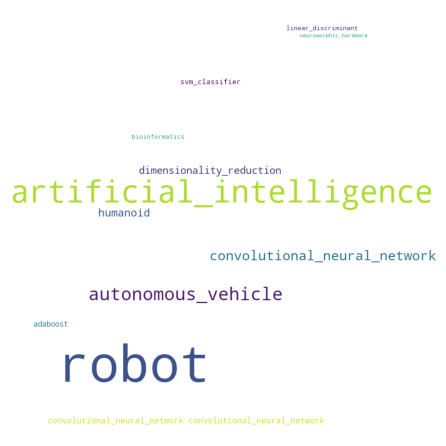

In [80]:
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

#### Save classified dataframe

In [81]:
df_classified.to_csv("classified_abstracts.csv", index=False)